# 1. Setting up the Environment and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3. Exploratory Data Analysis (EDA)

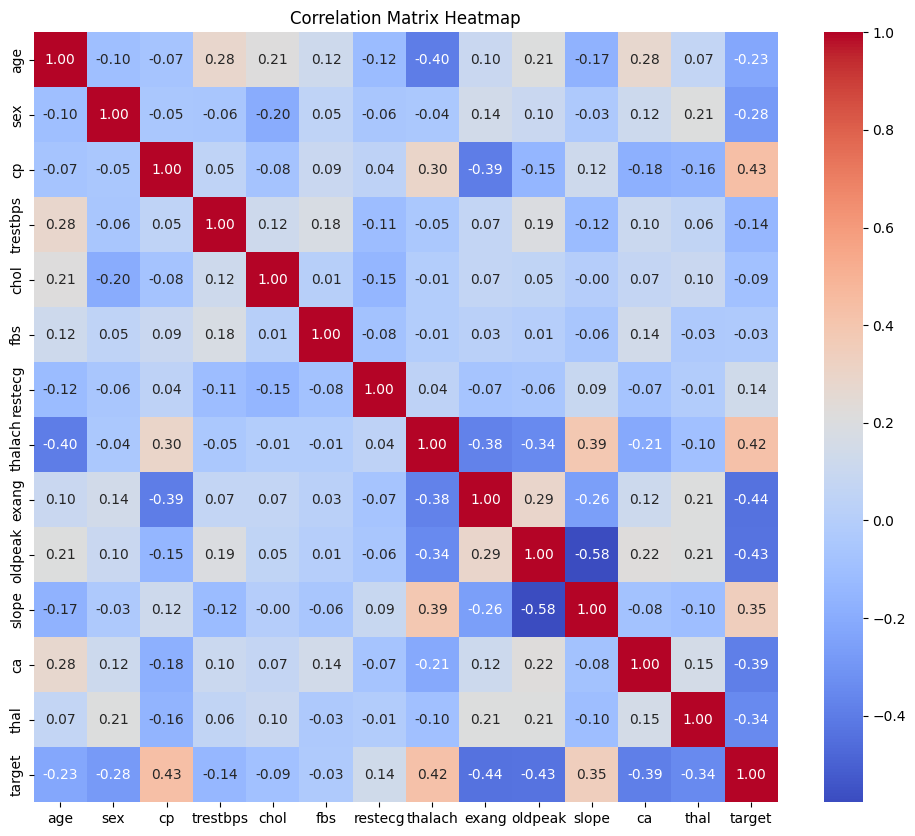

In [3]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Data Preparation

In [4]:
# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Training Machine Learning Models
#### train three different machine learning models: Logistic Regression, Random Forest, and Decision Tree.

In [5]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [6]:
# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [7]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# 6. Evaluating the Models

In [8]:
# Logistic Regression Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8524590163934426
Confusion Matrix:
 [[24  5]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [10]:
# Decision Tree Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.8360655737704918
Confusion Matrix:
 [[27  2]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



# 7. Visualizing the Results

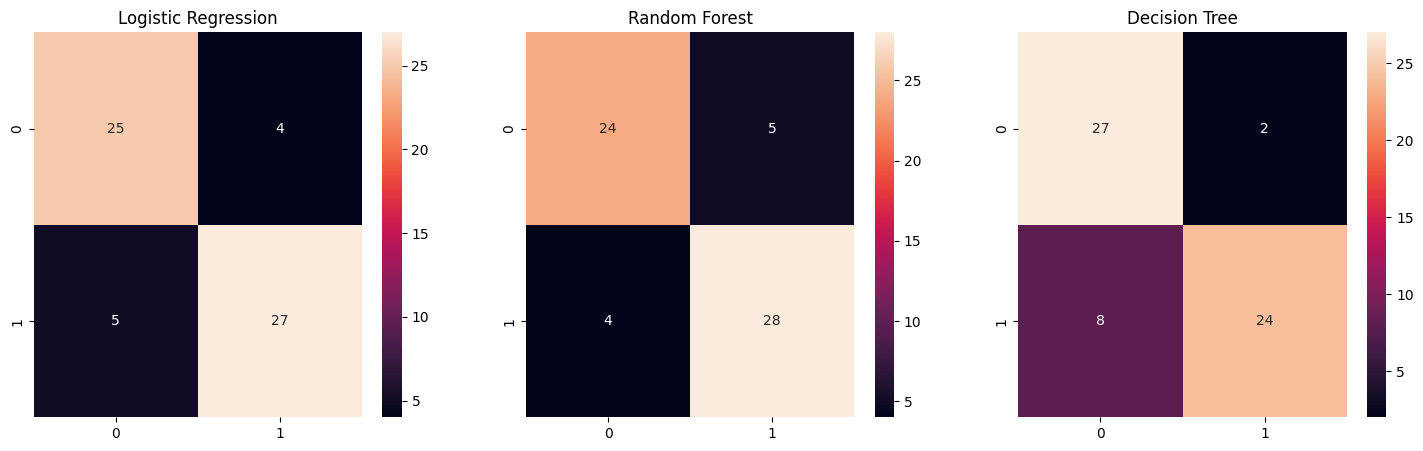

In [11]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Random Forest')

sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', ax=axes[2])
axes[2].set_title('Decision Tree')

plt.show()